# Working with Numpy FFT


## Prerequisites
Before proceeding with this lab make sure you are familiar with the <b>sampling theorem</b> and <b>the concept of aliasing</b>

Imports
-------

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Create a Test Signal
--------------------
$sampling_r$ is the sampling frequency, while $f$ is a base frequency for the signal content (and $\omega = 2\pi f$ the angular frequency we used in the definition of the Fourier Transform). We create a signal that contains components at a couple of multiples of $f$. Note the amplitudes here, since we will be trying to extract those correctly from the FFT later.


In the following, use: 
<ul>
    <li> sampling rate $sampling_r=1000$ Hz</li>
    <li> frequency $f = \frac{4}{\pi}$</li>
    <li> angular frequency $\omega = 2\pi f = 8$ </li>
    <li> acquisition time $time = 2\pi$</li>
</ul>

Let us consider the signal $y = \sin(\omega t) = \sin (8t)$ <img src="sinewavefunction.png">. 

In [9]:
### COMPLETE HERE ###

## sampling rate in Hz 
sampling_r = 1000

## acquisition time
t_m = 2*np.pi #time in s

## sampling 2s at f_s frequency
time = np.arange(0.0, t_m, 1/sampling_r) 


## number of samples
print("We consider %d samples"%time.size)

We consider 6284 samples


1.0001296623894704


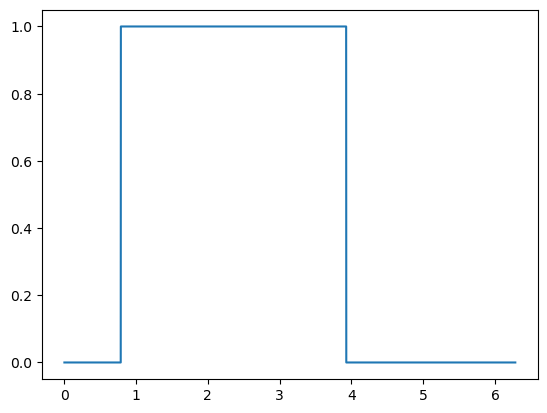

In [10]:
### COMPLETE HERE ###

## we considere angular_frequency=2
omega = 8

##frequency in Hz
f = omega/(2*np.pi)  

## function
y = np.sin(omega*time)

## function 2
from scipy.signal import square

plt.plot(time, square(time-np.pi/4)/2+0.5) 
y = square(time-np.pi/4)/2 + 0.5
#check the normalisation factor

print(np.dot(square(time-np.pi/2,0.5),square(time-np.pi/2,0.5))/(2*np.pi*sampling_r))

Text(0, 0.5, 'y')

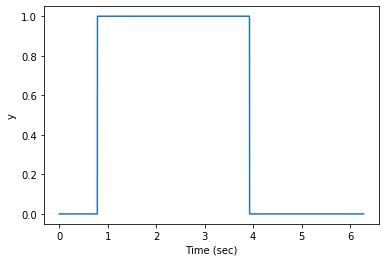

In [59]:
### COMPLETE HERE ###
## plot the signal vs time

plt.plot(time, y)
plt.xlabel("Time (sec)")
plt.ylabel("y")

Compute the FFT
---------------
Using the ${\tt numpy}$ library, compute:

<ul>
    <li>the FFT</li>
    <li>its matching vector of frequencies (np.fft.fftfreq)</li>
    <li>the inverse FFT (back to the signal)</li>
</ul>

In [60]:
n = len(time) ## number of samples

## array of fft(y)
fft_y = np.fft.fft(y)

## array of frequencies values
freq = np.fft.fftfreq(n, 1/sampling_r)

## estimate y through inverse FFT
y_est = np.fft.ifft(fft_y)

## Plot your results

Think even if you do not plot! What do you expect? Recall that the sinewave is and odd function. 

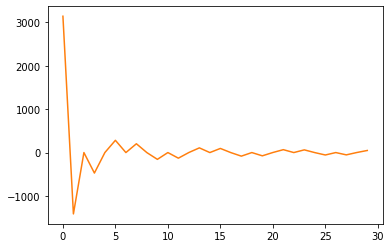

In [61]:
## complete here - plot the abs of FFT(y)

plt.plot(0, 10, fft_y[:30])

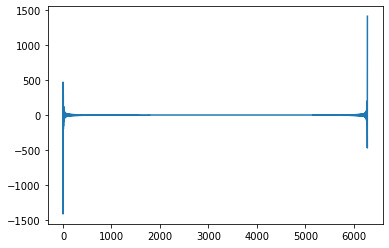

In [62]:
## complete here - plot the imaginary part of FFT(y)

plt.plot(np.imag(fft_y))

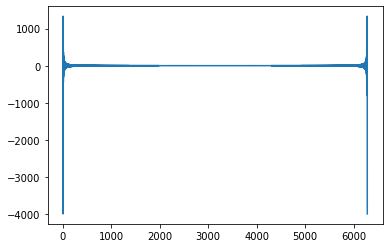

In [20]:
## complete here - plot the real part of FFT(y)

plt.plot(np.real(fft_y))

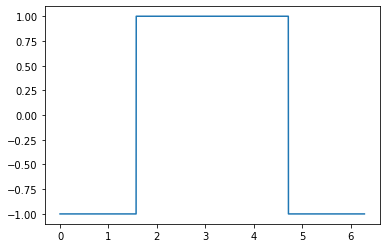

In [21]:
## complete here - plot the signal estimated through the Inverse FFT

plt.plot(time,np.real(y_est))

Is this what you expected? If we consider an acquisition time which is not a multiple of $2\pi$, do you expect any change in the FFT?

## Verify Parseval

Now we want to verify that the Parseval euqualiti holds. We first compute the energy of the signal y, then we compute the energy of the fft(y). 

We normalize once w.r.t. to the number of samples following <a href="https://en.wikipedia.org/wiki/Discrete_Fourier_transform#The_Plancherel_theorem_and_Parseval's_theorem" target="_blank">this notation</a>. 

In [10]:
def squared_norm(func):
    return np.vdot(func,func)

In [11]:
## parseval - norm of the function

## to evaluate the inner product we make use of the squared_norm function
norm_y = squared_norm(y)

print(norm_y)

3141.5926525762684


In [12]:
## parseval - sum of the squared coefficients of the series

## to evaluate the inner product we make use of the squared_norm function

norm_fft_y = 1/n*squared_norm(fft_y)

print(np.abs(norm_fft_y))

3141.592652576268


In [13]:
norm_y_est = squared_norm(y_est)
print(np.abs(norm_y_est))

3141.5926525762675


## Some more fun... (part 1)

Complete the exercise:

<ol>
    <li>Instead of using time=$[0,2\pi]$, choose a time interval that is not a multiple of the sine wave period. How does this affect the results above? </li> 
</ol>

## Let's do it for another signal

We will consider now $\frac{sin^2(at)}{a\pi t^2}$.

Recall the Fourier pair for this signal: 

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/231cdda1f8c22eff1cf11386602d76cb78daebc6">

Set y as a squared sinc with a = 150. Beware of the division by zero in t=0. 

In [27]:
a=10

epsilon = 10e-10

y = np.sin(a*(time+epsilon-np.pi))**2/(a*np.pi*(time+epsilon-np.pi)**2)

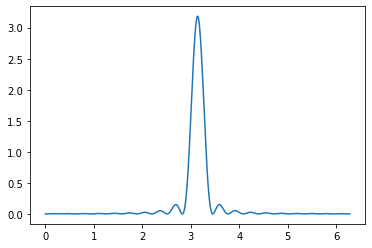

In [28]:
## complete here - plot the signal 
plt.plot(time, y)
#plt.xlim([0, 1])

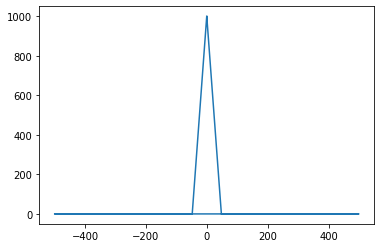

In [21]:
fft_y = np.fft.fft(y)
N=len(time)

plt.plot(np.fft.fftfreq(N,1/sampling_r),np.abs(fft_y)) 
#plt.ylim([0,150])

## Some more fun... (part 2)

Complete the exercise:

<ol>
    <li>Note that frequencies in the FFT and the `freq` vector go from zero to some larger positive number then from a large negative number back toward zero. We can swap that so that the DC component is in the center of the vector while maintaining a two-sided spectrum. Plot the spectrum of the FFT <b>adjusting</b> the frequecies (make use of the ${\tt np.fft.fftshift}$ function) </li>    
    <li>Try varying the <i>sampling frequency</i> $sampling_r$ until the FFT is clearly affected by <i>aliasing</i>     </li>   
</ol>